In [1]:
import sys
import os
import tensorflow as tf
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.python.keras.layers import  Convolution2D, MaxPooling2D
from tensorflow.python.keras import backend as K
import datetime
import time
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
import random
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from tensorflow.keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
import itertools
import pickle
from sklearn.metrics import confusion_matrix


data_entrenamiento = "/home/jovyan/dataset-final/train"
data_validacion = "/home/jovyan/dataset-final/val"
data_test = "/home/jovyan/dataset-final/test"


Using TensorFlow backend.


In [2]:
"""
Parameters para modelo NM
"""
#epocas=60
longitud, altura = 224, 224
batch_size = 32
nb_train_samples = 7039
nb_validation_samples = 1508
nb_test_samples = 1508
filtrosConv1 = 32
filtrosConv2 = 64
tamano_filtro1 = (3, 3)
tamano_filtro2 = (2, 2)
tamano_pool = (2, 2)
clases = 2

In [3]:
#MODELO NM, modelo MM con cambios de hashtag, MM2 introduce el early stopping
seed = 1
random.seed(seed)
os.environ['PYTHONHASHSEED']='seed'
tf.set_random_seed(seed)
np.random.seed(seed)

#gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.4)
#sess = tf.Session(config=tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1, gpu_options=gpu_options))

sess = tf.Session(config=tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1))

#Preparación de las imágenes

entrenamiento_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)


entrenamiento_generador = entrenamiento_datagen.flow_from_directory(
    data_entrenamiento,
    target_size=(altura, longitud),
    batch_size=batch_size,
    class_mode='binary',
    seed = seed)

validacion_generador = test_datagen.flow_from_directory(
    data_validacion,
    target_size=(altura, longitud),
    batch_size=batch_size,
    class_mode='binary',
    seed = seed)

#test_batches = ImageDataGenerator().flow_from_directory(
#    data_test,
#    target_size=(altura, longitud),
#    classes=['linear','nonlinear'],
#    seed = seed,
#    batch_size=batch_size)



Found 7039 images belonging to 2 classes.
Found 1508 images belonging to 2 classes.


In [ ]:

act = function(init='zero', weights=None)

UU-1-conv-64-nodes-1-dense-0.001-learning-0.5-drop
Epoch 1/20
219/219 [==============================] - 96s 438ms/step - loss: 21.8450 - acc: 0.6151 - val_loss: 2.1990 - val_acc: 0.7254
Epoch 2/20
219/219 [==============================] - 95s 435ms/step - loss: 1.2972 - acc: 0.7223 - val_loss: 1.5513 - val_acc: 0.7480
Epoch 3/20
219/219 [==============================] - 95s 434ms/step - loss: 1.0854 - acc: 0.7405 - val_loss: 1.3645 - val_acc: 0.6835
Epoch 4/20
219/219 [==============================] - 95s 432ms/step - loss: 0.9809 - acc: 0.7561 - val_loss: 1.2144 - val_acc: 0.7108
Epoch 5/20
219/219 [==============================] - 95s 433ms/step - loss: 0.9100 - acc: 0.7658 - val_loss: 1.1504 - val_acc: 0.6862
Epoch 6/20
219/219 [==============================] - 94s 431ms/step - loss: 0.8629 - acc: 0.7671 - val_loss: 1.0437 - val_acc: 0.7400
Epoch 7/20
219/219 [==============================] - 94s 427ms/step - loss: 0.8354 - acc: 0.7728 - val_loss: 1.0207 - val_acc: 0.7081
Epo

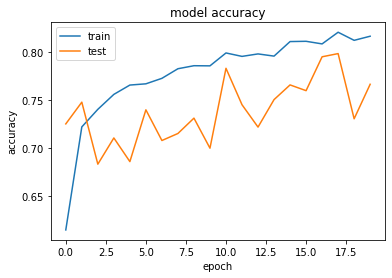

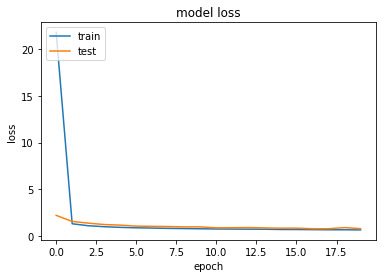

UU-1-conv-64-nodes-1-dense-0.0001-learning-0.4-drop
Epoch 1/20
219/219 [==============================] - 96s 438ms/step - loss: 140.2640 - acc: 0.6893 - val_loss: 26.4575 - val_acc: 0.7281
Epoch 2/20
219/219 [==============================] - 96s 438ms/step - loss: 9.6596 - acc: 0.7642 - val_loss: 7.4620 - val_acc: 0.7759
Epoch 3/20
219/219 [==============================] - 95s 436ms/step - loss: 4.1679 - acc: 0.7748 - val_loss: 5.2810 - val_acc: 0.8072
Epoch 4/20
219/219 [==============================] - 95s 434ms/step - loss: 3.1643 - acc: 0.7826 - val_loss: 4.2607 - val_acc: 0.7606
Epoch 5/20
219/219 [==============================] - 94s 430ms/step - loss: 2.5488 - acc: 0.7942 - val_loss: 3.4312 - val_acc: 0.7985
Epoch 6/20
219/219 [==============================] - 94s 430ms/step - loss: 2.1688 - acc: 0.7836 - val_loss: 3.0198 - val_acc: 0.7507
Epoch 7/20
219/219 [==============================] - 94s 428ms/step - loss: 1.8770 - acc: 0.7958 - val_loss: 2.6280 - val_acc: 0.7540


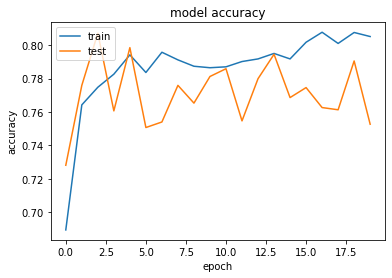

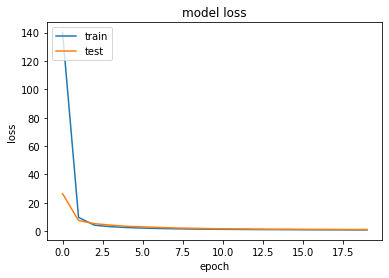

UU-1-conv-64-nodes-1-dense-0.0001-learning-0.5-drop
Epoch 1/20
219/219 [==============================] - 95s 436ms/step - loss: 537.0736 - acc: 0.6298 - val_loss: 142.1578 - val_acc: 0.7340
Epoch 2/20
219/219 [==============================] - 95s 436ms/step - loss: 56.6703 - acc: 0.7434 - val_loss: 21.9412 - val_acc: 0.7992
Epoch 3/20
219/219 [==============================] - 95s 434ms/step - loss: 9.5821 - acc: 0.7958 - val_loss: 9.0728 - val_acc: 0.8039
Epoch 4/20
219/219 [==============================] - 95s 432ms/step - loss: 4.8536 - acc: 0.7871 - val_loss: 6.9361 - val_acc: 0.7759
Epoch 5/20
219/219 [==============================] - 94s 431ms/step - loss: 3.8642 - acc: 0.7865 - val_loss: 5.7295 - val_acc: 0.7879
Epoch 6/20
219/219 [==============================] - 93s 427ms/step - loss: 3.2355 - acc: 0.7941 - val_loss: 4.8685 - val_acc: 0.7686
Epoch 7/20
219/219 [==============================] - 93s 427ms/step - loss: 2.7530 - acc: 0.7968 - val_loss: 4.1439 - val_acc: 0.77

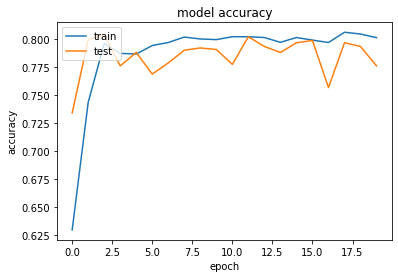

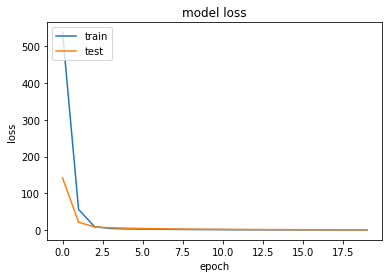

UU-1-conv-64-nodes-1-dense-0.0001-learning-0.6-drop
Epoch 1/20
219/219 [==============================] - 96s 436ms/step - loss: 387.0699 - acc: 0.5928 - val_loss: 121.5443 - val_acc: 0.6150
Epoch 2/20
219/219 [==============================] - 95s 435ms/step - loss: 53.9174 - acc: 0.6378 - val_loss: 24.8953 - val_acc: 0.7354
Epoch 3/20
219/219 [==============================] - 95s 432ms/step - loss: 11.2993 - acc: 0.6932 - val_loss: 10.1987 - val_acc: 0.7553
Epoch 4/20
219/219 [==============================] - 94s 430ms/step - loss: 5.3269 - acc: 0.7183 - val_loss: 7.4099 - val_acc: 0.7094
Epoch 5/20
219/219 [==============================] - 94s 430ms/step - loss: 4.0678 - acc: 0.7473 - val_loss: 6.0416 - val_acc: 0.7467
Epoch 6/20
219/219 [==============================] - 93s 427ms/step - loss: 3.3417 - acc: 0.7668 - val_loss: 4.9782 - val_acc: 0.7872
Epoch 7/20
219/219 [==============================] - 93s 426ms/step - loss: 2.8096 - acc: 0.7804 - val_loss: 4.3808 - val_acc: 0.

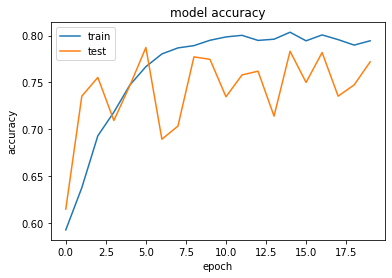

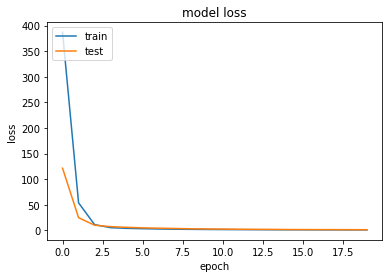

UU-1-conv-64-nodes-1-dense-0.0001-learning-0.7-drop
Epoch 1/20
219/219 [==============================] - 96s 437ms/step - loss: 216.4633 - acc: 0.6341 - val_loss: 33.5970 - val_acc: 0.7340
Epoch 2/20
219/219 [==============================] - 95s 435ms/step - loss: 11.4572 - acc: 0.7326 - val_loss: 7.8819 - val_acc: 0.6775
Epoch 3/20
219/219 [==============================] - 95s 433ms/step - loss: 4.4512 - acc: 0.7548 - val_loss: 6.0098 - val_acc: 0.6496
Epoch 4/20
219/219 [==============================] - 95s 432ms/step - loss: 3.4876 - acc: 0.7590 - val_loss: 4.7127 - val_acc: 0.7793
Epoch 5/20
219/219 [==============================] - 94s 431ms/step - loss: 2.8278 - acc: 0.7806 - val_loss: 3.9485 - val_acc: 0.7513
Epoch 6/20
219/219 [==============================] - 94s 428ms/step - loss: 2.3808 - acc: 0.7789 - val_loss: 3.3760 - val_acc: 0.7287
Epoch 7/20
219/219 [==============================] - 93s 426ms/step - loss: 2.0441 - acc: 0.7811 - val_loss: 2.9147 - val_acc: 0.7374

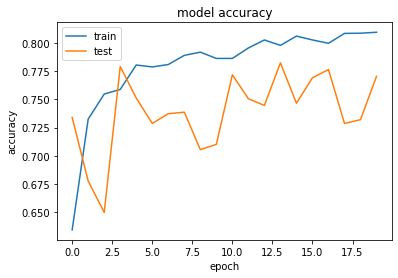

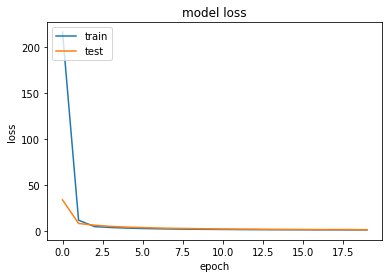

UU-1-conv-64-nodes-1-dense-1e-05-learning-0.5-drop
Epoch 1/20
219/219 [==============================] - 95s 436ms/step - loss: 1084.3217 - acc: 0.5931 - val_loss: 982.6637 - val_acc: 0.6396
Epoch 2/20
219/219 [==============================] - 96s 436ms/step - loss: 878.2831 - acc: 0.6452 - val_loss: 796.2697 - val_acc: 0.6483
Epoch 3/20
219/219 [==============================] - 95s 435ms/step - loss: 710.2511 - acc: 0.6670 - val_loss: 643.9234 - val_acc: 0.7055
Epoch 4/20
219/219 [==============================] - 94s 430ms/step - loss: 572.1995 - acc: 0.6944 - val_loss: 518.5887 - val_acc: 0.7520
Epoch 5/20
219/219 [==============================] - 94s 430ms/step - loss: 458.8966 - acc: 0.7160 - val_loss: 415.6560 - val_acc: 0.7660
Epoch 6/20
219/219 [==============================] - 94s 429ms/step - loss: 366.5561 - acc: 0.7368 - val_loss: 331.2925 - val_acc: 0.7719
Epoch 7/20
219/219 [==============================] - 94s 427ms/step - loss: 290.3769 - acc: 0.7517 - val_loss: 26

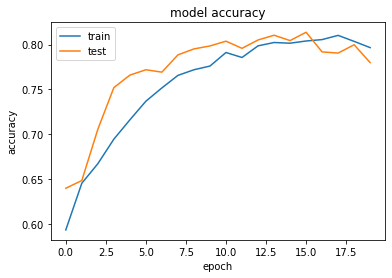

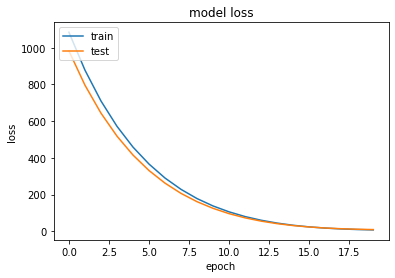

UU-1-conv-64-nodes-1-dense-1e-06-learning-0.5-drop
Epoch 1/20
219/219 [==============================] - 96s 438ms/step - loss: 1555.8974 - acc: 0.5807 - val_loss: 1554.1611 - val_acc: 0.6017
Epoch 2/20
219/219 [==============================] - 95s 435ms/step - loss: 1527.0173 - acc: 0.6001 - val_loss: 1526.9877 - val_acc: 0.6017
Epoch 3/20
219/219 [==============================] - 95s 433ms/step - loss: 1500.8393 - acc: 0.5957 - val_loss: 1500.3066 - val_acc: 0.5971
Epoch 4/20
219/219 [==============================] - 94s 431ms/step - loss: 1475.6330 - acc: 0.6043 - val_loss: 1474.1230 - val_acc: 0.5924
Epoch 5/20
219/219 [==============================] - 95s 432ms/step - loss: 1448.2721 - acc: 0.6058 - val_loss: 1448.4833 - val_acc: 0.5931
Epoch 6/20
219/219 [==============================] - 94s 430ms/step - loss: 1423.8203 - acc: 0.6175 - val_loss: 1423.2936 - val_acc: 0.5918
Epoch 7/20
219/219 [==============================] - 94s 428ms/step - loss: 1399.5123 - acc: 0.6270 - 

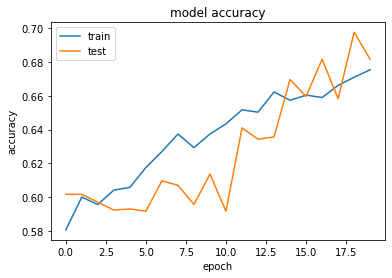

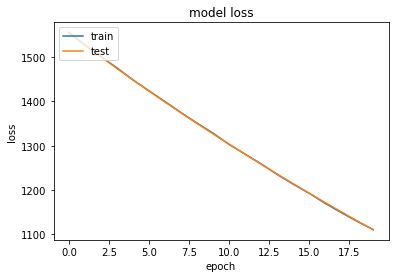

UU-2-conv-64-nodes-1-dense-0.001-learning-0.5-drop
Epoch 1/20
219/219 [==============================] - 96s 436ms/step - loss: 89.0805 - acc: 0.6399 - val_loss: 5.4276 - val_acc: 0.7380
Epoch 2/20
219/219 [==============================] - 95s 434ms/step - loss: 3.3033 - acc: 0.7094 - val_loss: 3.1975 - val_acc: 0.7340
Epoch 3/20
219/219 [==============================] - 95s 436ms/step - loss: 2.1147 - acc: 0.7411 - val_loss: 2.2747 - val_acc: 0.7168
Epoch 4/20
219/219 [==============================] - 95s 433ms/step - loss: 1.5994 - acc: 0.7454 - val_loss: 1.8447 - val_acc: 0.6742
Epoch 5/20
219/219 [==============================] - 95s 432ms/step - loss: 1.3075 - acc: 0.7471 - val_loss: 1.5176 - val_acc: 0.7035
Epoch 6/20
219/219 [==============================] - 94s 430ms/step - loss: 1.1652 - acc: 0.7532 - val_loss: 1.5016 - val_acc: 0.6469
Epoch 7/20
219/219 [==============================] - 94s 428ms/step - loss: 1.0533 - acc: 0.7540 - val_loss: 1.3332 - val_acc: 0.6961
Epo

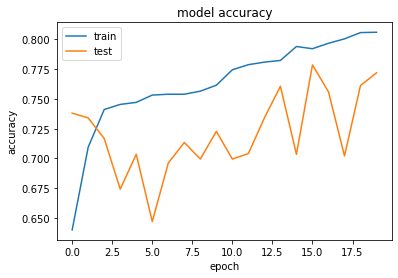

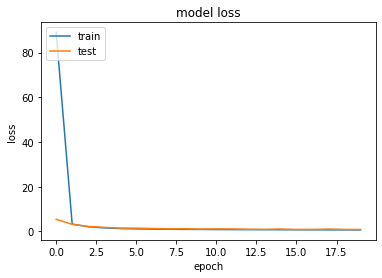

UU-2-conv-64-nodes-1-dense-0.0001-learning-0.4-drop
Epoch 1/20
219/219 [==============================] - 96s 439ms/step - loss: 168.1566 - acc: 0.6248 - val_loss: 37.5914 - val_acc: 0.7779
Epoch 2/20
219/219 [==============================] - 95s 435ms/step - loss: 15.8758 - acc: 0.7243 - val_loss: 14.4504 - val_acc: 0.7493
Epoch 3/20
219/219 [==============================] - 95s 433ms/step - loss: 8.2293 - acc: 0.7558 - val_loss: 10.6161 - val_acc: 0.7699
Epoch 4/20
219/219 [==============================] - 95s 433ms/step - loss: 6.3272 - acc: 0.7765 - val_loss: 8.4023 - val_acc: 0.7766
Epoch 5/20
219/219 [==============================] - 94s 430ms/step - loss: 5.1205 - acc: 0.7856 - val_loss: 6.8987 - val_acc: 0.7593
Epoch 6/20
219/219 [==============================] - 94s 427ms/step - loss: 4.2509 - acc: 0.8083 - val_loss: 5.7865 - val_acc: 0.7806
Epoch 7/20
219/219 [==============================] - 93s 426ms/step - loss: 3.6821 - acc: 0.8041 - val_loss: 4.9881 - val_acc: 0.78

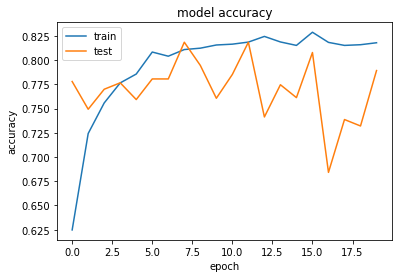

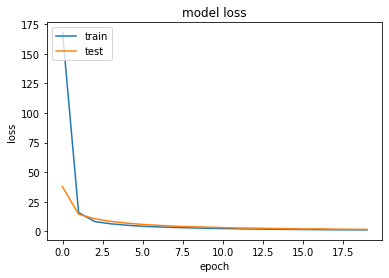

UU-2-conv-64-nodes-1-dense-0.0001-learning-0.5-drop
Epoch 1/20
219/219 [==============================] - 96s 436ms/step - loss: 358.9298 - acc: 0.5984 - val_loss: 78.1242 - val_acc: 0.6044
Epoch 2/20
219/219 [==============================] - 95s 436ms/step - loss: 28.4795 - acc: 0.6533 - val_loss: 14.7155 - val_acc: 0.7028
Epoch 3/20
219/219 [==============================] - 95s 432ms/step - loss: 8.7183 - acc: 0.7020 - val_loss: 10.1760 - val_acc: 0.7533
Epoch 4/20
219/219 [==============================] - 94s 431ms/step - loss: 6.5653 - acc: 0.7451 - val_loss: 8.2484 - val_acc: 0.7566
Epoch 5/20
219/219 [==============================] - 94s 430ms/step - loss: 5.3158 - acc: 0.7624 - val_loss: 6.8497 - val_acc: 0.7606
Epoch 6/20
219/219 [==============================] - 94s 428ms/step - loss: 4.4073 - acc: 0.7814 - val_loss: 5.7709 - val_acc: 0.8158
Epoch 7/20
219/219 [==============================] - 93s 425ms/step - loss: 3.7845 - acc: 0.7978 - val_loss: 5.0412 - val_acc: 0.79

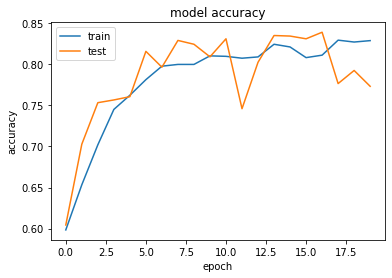

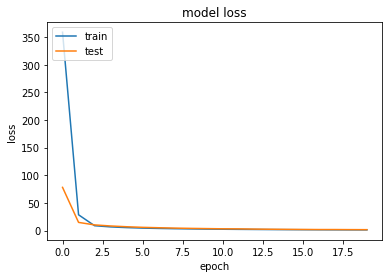

UU-2-conv-64-nodes-1-dense-0.0001-learning-0.6-drop
Epoch 1/20
219/219 [==============================] - 95s 436ms/step - loss: 208.9375 - acc: 0.5967 - val_loss: 43.3736 - val_acc: 0.6915
Epoch 2/20
219/219 [==============================] - 95s 434ms/step - loss: 18.0310 - acc: 0.6819 - val_loss: 14.2555 - val_acc: 0.7347
Epoch 3/20
219/219 [==============================] - 95s 432ms/step - loss: 9.2811 - acc: 0.7030 - val_loss: 10.9778 - val_acc: 0.7487
Epoch 4/20
219/219 [==============================] - 95s 433ms/step - loss: 7.3595 - acc: 0.7317 - val_loss: 8.8443 - val_acc: 0.7600
Epoch 5/20
219/219 [==============================] - 95s 432ms/step - loss: 6.0009 - acc: 0.7488 - val_loss: 7.2452 - val_acc: 0.7992
Epoch 6/20
219/219 [==============================] - 94s 427ms/step - loss: 5.0369 - acc: 0.7675 - val_loss: 6.1698 - val_acc: 0.7826
Epoch 7/20
219/219 [==============================] - 94s 427ms/step - loss: 4.3064 - acc: 0.7836 - val_loss: 5.2867 - val_acc: 0.79

In [ ]:
epocas=20
dense_layers = [1,2]
layer_sizes = [64,256]
conv_layers = [1,2]
lr = [1e-3, 1e-4, 1e-5, 1e-6]
drop_rate =[0.4, 0.5, 0.6, 0.7]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            for learning in lr:
                for dropout_rate in drop_rate:

                    model = None
                    del model
                    K.clear_session()
                    K.set_session(sess)
                    optimizer=optimizers.Adam(lr=learning)

                    filenames= os.listdir ("/home/jovyan/logs-UU/") # get all files' and folders' names in the current directory

                    result = []
                    for filename in filenames:
                        result.append(filename)

                    NAME = "UU-{}-conv-{}-nodes-{}-dense-{}-learning-{}-drop".format(conv_layer, layer_size, dense_layer, learning, dropout_rate)
                    NAME_MC = "UU-{}-conv-{}-nodes-{}-dense-{}-learning-{}-drop-best.h5".format(conv_layer, layer_size, dense_layer, learning, dropout_rate)
                    NAME_MODEL = "UU-{}-conv-{}-nodes-{}-dense-{}-learning-{}-drop-model.h5".format(conv_layer, layer_size, dense_layer, learning, dropout_rate)


                    if NAME in result:
                        pass
                    else:

                        model = Sequential()


                        model.add(Conv2D(filtrosConv1, tamano_filtro1, padding ="same", kernel_regularizer=regularizers.l1_l2(0.01), 
                           activity_regularizer=regularizers.l2(0.01), input_shape=(longitud, altura, 3), activation='relu'))
                        model.add(MaxPooling2D(pool_size=tamano_pool))

                        model.add(Conv2D(filtrosConv1, tamano_filtro1, padding ="same", input_shape=(longitud, altura, 3), activation='relu'))
                        model.add(MaxPooling2D(pool_size=tamano_pool))

                        for l in range(conv_layer-1):
                            model.add(Conv2D(filtrosConv2, tamano_filtro2, kernel_regularizer=regularizers.l1_l2(0.01), 
                                            activity_regularizer=regularizers.l2(0.01), padding ="same"))
                            model.add(MaxPooling2D(pool_size=tamano_pool))

                        model.add(Dropout(dropout_rate))

                        for l in range(conv_layer-1):


                            model.add(Conv2D(filtrosConv2, tamano_filtro2, padding ="same"))
                            model.add(MaxPooling2D(pool_size=tamano_pool))
                            model.add(Dropout(dropout_rate))

                        model.add(Flatten())

                        for _ in range(dense_layer):
                            model.add(Dense(layer_size))
                            model.add(Activation('relu'))


                        model.add(Dense(1))
                        model.add(Activation('sigmoid'))


                        model.compile(loss='binary_crossentropy',
                                      optimizer=optimizers.Adam(lr=learning),
                                      metrics=['accuracy'],
                                      )


                        tensorboard = TensorBoard(log_dir='/home/jovyan/logs-UU/{}'.format(NAME))
                        early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, min_delta=1e-4)  
                        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1, min_delta=1e-4)
                        mc = ModelCheckpoint(filepath='{}'.format(NAME_MC), monitor='val_loss', verbose=0, save_best_only=True,
                                            save_weights_only=False,
                                            mode='min',
                                            period=5)
                        callbacks_list = [reduce_lr, tensorboard,early_stop,mc]

                        print(NAME)
                        history = model.fit_generator(
                                                        entrenamiento_generador,
                                                        steps_per_epoch=nb_train_samples // batch_size,
                                                        validation_steps=nb_validation_samples // batch_size,
                                                        epochs=epocas,
                                                        validation_data=validacion_generador,
                                                        callbacks=callbacks_list)

                        ## summarize history for accuracy
                        plt.plot(history.history['acc'])
                        plt.plot(history.history['val_acc'])
                        plt.title('model accuracy')
                        plt.ylabel('accuracy')
                        plt.xlabel('epoch')
                        plt.legend(['train', 'test'], loc='upper left')
                        plt.show()

                        ## summarize history for loss
                        plt.plot(history.history['loss'])
                        plt.plot(history.history['val_loss'])
                        plt.title('model loss')
                        plt.ylabel('loss')
                        plt.xlabel('epoch')
                        plt.legend(['train', 'test'], loc='upper left')
                        plt.show()

                        #import pickle
                        #pickle_out = open('history_pickle_{}'.format(NAME),"wb")
                        #pickle.dump(history.history, pickle_out)
                        #pickle_out.close()

                        model.save('{}'.format(NAME_MODEL))


In [ ]:
import sys
import os
filenames= os.listdir ("/home/jovyan/logs-download-final-tb/") # get all files' and folders' names in the current directory

result = []
for filename in filenames: # loop through all the files and folders
    if os.path.isdir(os.path.join(os.path.abspath("."), filename)): # check whether the current object is a folder or not
        result.append(filename)
result

In [ ]:
import sys
import os
filenames= os.listdir ("/home/jovyan/logs-download-final-tb/") # get all files' and folders' names in the current directory

result = []
for filename in filenames: # loop through all the files and folders
    result.append(filename)
result

In [ ]:
NAME

In [ ]:
import tensorflow as tf
print(tf.__version__)